In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

train_dir='E:/flipr/Train_dataset.xlsx'
test_dir='E:/flipr/Test_dataset.xlsx'

df = pd.read_excel(train_dir)
df_test= pd.read_excel(test_dir)

# General overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population_2011    739 non-null    float64
 4   Population_2001    295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                787 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  hospitals          772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

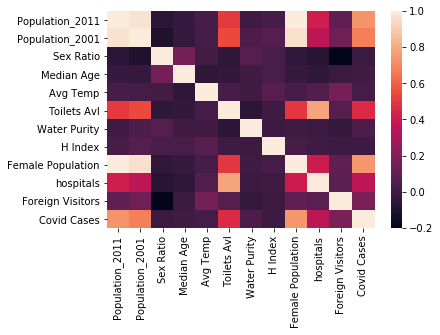

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Checking missing values

In [5]:
df.isnull().sum()

City                   0
State                  0
Type                   0
Population_2011       48
Population_2001      492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    0
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
hospitals             15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [6]:
df_test.isnull().sum()

City                   0
State                  0
Type                   2
Population_2011        6
Popuation_2001       501
Sex Ratio              5
Median Age            13
Avg Temp              14
SWM                    0
Toilets Avl           22
Water Purity          19
H Index               15
Female Population     15
hospitals             17
Foreign Visitors      17
dtype: int64

In [7]:
print(len(df))
print(len(df_test))

787
501


In [8]:
print(len(df.City.unique()))
print(len(df.State.unique()))
print(len(df.Type.unique()))
print(len(df.SWM.unique()))   

772
33
37
3


In [9]:
df_test

,City,State,Type,Population_2011,Popuation_2001,Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Nandaprayag,Uttarakhand,N.P,1641.0,NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0,105882.0
497,Kirtinagar,Uttarakhand,N.P,1517.0,NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0,105882.0
498,Kedarnath,Uttarakhand,N.P,612.0,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0,105882.0
499,Gangotri,Uttarakhand,N.P,110.0,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0,105882.0


# Now dealing with each feautre individually

### Removing obvious unecessary features which are not required in prediction

In [10]:
df=df.drop(['City','State','Population_2001','Type'], axis=1)
df_test=df_test.drop(['City','State','Popuation_2001','Type'], axis=1)

### 1.Sex Ratio

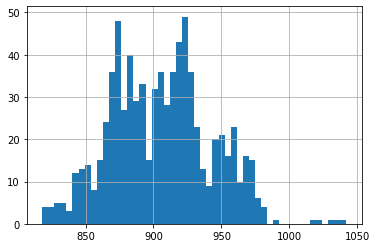

In [11]:
# data distribution
df['Sex Ratio'].hist(bins=50)

In [12]:
# filling missing values with mean
mean_sr= df['Sex Ratio'].mean()
df['Sex Ratio'].fillna(mean_sr,inplace=True)
df_test['Sex Ratio'].fillna(mean_sr,inplace=True)
df['Sex Ratio'].isnull().sum()

0

In [13]:
# Dividing data points by 1000 to convert them in ratio
df['Sex Ratio']=df['Sex Ratio'].astype('int64')/1000
df_test['Sex Ratio']=df_test['Sex Ratio'].astype('int64')/1000
df['Sex Ratio']

0      0.878
1      0.858
2      0.936
3      0.930
4      0.852
       ...  
782    0.846
783    0.945
784    1.019
785    0.900
786    0.889
Name: Sex Ratio, Length: 787, dtype: float64

### 2.SWM

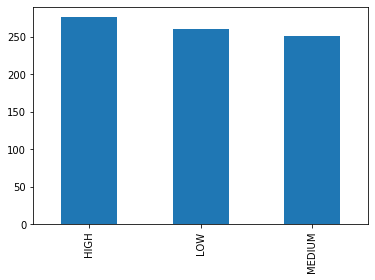

In [14]:
# # data distribution
df['SWM'].value_counts().plot.bar()

In [15]:
# filling missing values with mode
mode_swm=df['SWM'].mode()
df['SWM'].fillna(mode_swm,inplace=True)
df_test['SWM'].fillna(mode_swm,inplace=True)
df['SWM'].isnull().sum()

0

In [16]:
# Dealing with categorical values ... encoding them
dummies_train  = pd.get_dummies(df['SWM'])
dummies_train.drop(['MEDIUM'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['SWM'])
dummies_test.drop(['MEDIUM'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['SWM'],axis=1,inplace=True)
df.drop(['SWM'],axis=1,inplace=True)

In [17]:
df

,Population_2011,Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,hospitals,Foreign Visitors,Covid Cases,HIGH,LOW
0,12442373.0,0.878,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115,0,0
1,11007835.0,0.858,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188,0,0
2,8436675.0,0.936,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000,1,0
3,6809970.0,0.930,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123,0,0
4,5570585.0,0.852,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,36954.0,0.846,23.0,28.0,68.0,103.0,0.035280,31263.0,19.0,284973.0,1944,0,0
783,36947.0,0.945,23.0,36.0,62.0,136.0,0.056394,34915.0,22.0,1489500.0,2172,0,0
784,36828.0,1.019,28.0,28.0,98.0,138.0,0.066752,37528.0,27.0,106153.0,2851,1,0
785,36805.0,0.900,24.0,6.0,63.0,145.0,0.627556,33125.0,15.0,24720.0,2158,0,0


### 3.Median Age

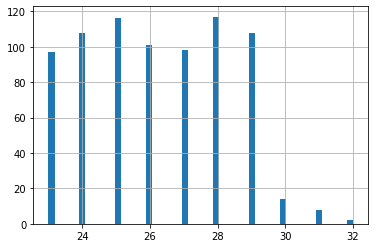

In [18]:
df['Median Age'].hist(bins=50)

In [19]:
# filling missing values with median age
median_age=df['Median Age'].median()
df['Median Age'].fillna(median_age,inplace=True)
df_test['Median Age'].fillna(median_age,inplace=True)
df['Median Age'].isnull().sum()

0

In [20]:
df['Median Age']=df['Median Age'].astype('int64')
df_test['Median Age']=df_test['Median Age'].astype('int64')

### 4.Avg Temp

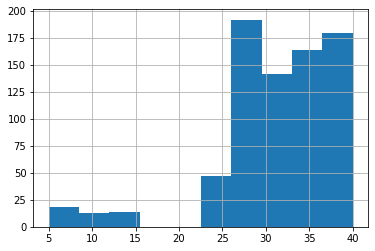

In [21]:
df['Avg Temp'].hist(bins=10)

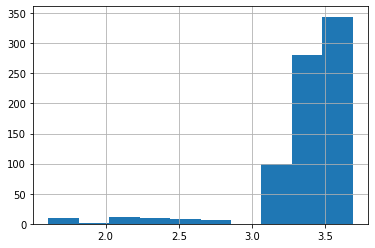

In [22]:
F= np.log(df['Avg Temp'])
F.hist(bins=10)
## seems like no change when log transformation is applied

In [23]:
# filling missing values with mean temp
mean_temp=df['Avg Temp'].mean()
mean_temp=mean_temp.astype('int64')
df['Avg Temp'].fillna(mean_temp,inplace=True)
df_test['Avg Temp'].fillna(mean_temp,inplace=True)
df['Avg Temp'].isnull().sum()

0

In [24]:
df['Avg Temp']=df['Avg Temp'].astype('int64')
df_test['Avg Temp']=df_test['Avg Temp'].astype('int64')

### 5.Hospitals

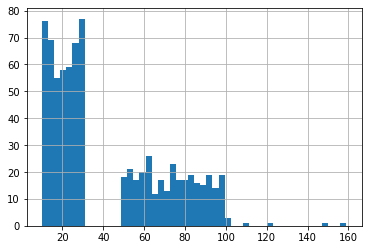

In [25]:
df['hospitals'].hist(bins=50)

In [26]:
# filling missing values with random int between 10-30
df['hospitals'].fillna(np.random.randint(low=10, high=30),inplace=True)
df_test['hospitals'].fillna(np.random.randint(low=10, high=30),inplace=True)
df['hospitals'].isnull().sum()

0

In [27]:
df['hospitals']=df['hospitals'].astype('int64')
df_test['hospitals']=df_test['hospitals'].astype('int64')

### 6.Toilets Avl

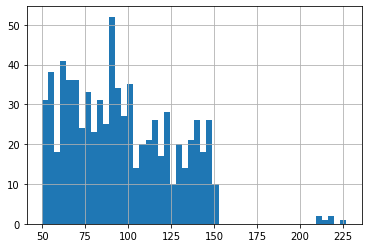

In [28]:
df['Toilets Avl'].hist(bins=50)

In [29]:
# filling missing values with mean 
mean_toilet=df['Toilets Avl'].mean()
mean_toilet=mean_toilet.astype('int64')
df['Toilets Avl'].fillna(mean_toilet,inplace=True)
df_test['Toilets Avl'].fillna(mean_toilet,inplace=True)
df['Toilets Avl'].isnull().sum()

0

In [30]:
df['Toilets Avl']=df['Toilets Avl'].astype('int64')
df_test['Toilets Avl']=df_test['Toilets Avl'].astype('int64')

### 7.Water Purity 	

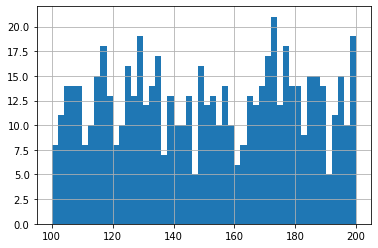

In [31]:
df['Water Purity'].hist(bins=50)

In [32]:
# filling missing values with mean 
mean_water=df['Water Purity'].mean()
mean_water=mean_water.astype('int64')
df['Water Purity'].fillna(mean_water,inplace=True)
df_test['Water Purity'].fillna(mean_water,inplace=True)
df['Water Purity'].isnull().sum()

0

In [33]:
df['Water Purity']=df['Water Purity'].astype('int64')
df_test['Water Purity']=df_test['Water Purity'].astype('int64')

### 8.H Index

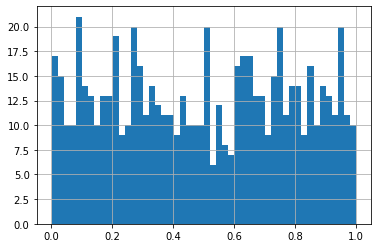

In [34]:
df['H Index'].hist(bins=50)

In [35]:
# filling missing values with mean 
mean_index=df['H Index'].mean()
df['H Index'].fillna(mean_index,inplace=True)
df_test['H Index'].fillna(mean_index,inplace=True)
df['H Index'].isnull().sum()

0

### 9.Foreign Visitors

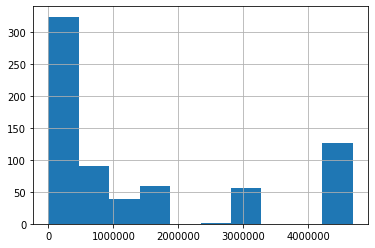

In [36]:
df['Foreign Visitors'].hist(bins=10)

In [37]:
max_viz=df['Foreign Visitors'].max()
min_viz=df['Foreign Visitors'].min()
min_viz

798.0

In [38]:
# filling missing values with random int between 100000-1000000
df['Foreign Visitors'].fillna(np.random.randint(low=100000, high=1000000),inplace=True)
df_test['Foreign Visitors'].fillna(np.random.randint(low=100000, high=1000000),inplace=True)
df['Foreign Visitors'].isnull().sum()

0

In [39]:
df['Foreign Visitors']=df['Foreign Visitors'].astype('int64')
df_test['Foreign Visitors']=df_test['Foreign Visitors'].astype('int64')

In [40]:
df.head(5)

,Population_2011,Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,hospitals,Foreign Visitors,Covid Cases,HIGH,LOW
0,12442373.0,0.878,23,32,219,150,0.700440,10924403.0,159,4408916,163115,0,0
1,11007835.0,0.858,27,30,215,196,0.920018,9444722.0,148,2379169,80188,0,0
2,8436675.0,0.936,28,37,212,102,0.097085,7896728.0,123,636502,141000,1,0
3,6809970.0,0.930,23,31,217,118,0.827744,6333272.0,110,126078,55123,0,0
4,5570585.0,0.852,29,25,227,109,0.847941,4746138.0,73,284973,33204,0,1


In [41]:
df_test.head(5)

,Population_2011,Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,hospitals,Foreign Visitors,HIGH,LOW
0,36774.0,0.931,23,10,94,114,0.253390,34237.0,17,2769,0,0
1,36754.0,0.934,25,38,62,160,0.192555,34328.0,13,636502,1,0
2,36732.0,0.883,29,35,63,105,0.887882,32434.0,17,242367,1,0
3,36706.0,0.887,26,31,60,174,0.407838,32558.0,11,4408916,1,0
4,36669.0,0.877,28,39,92,153,0.324456,32159.0,23,3104060,0,1


In [42]:
df.to_csv('train.csv')
df_test.to_csv('test.csv')

In [43]:
df_test.isnull().sum()

Population_2011       6
Sex Ratio             0
Median Age            0
Avg Temp              0
Toilets Avl           0
Water Purity          0
H Index               0
Female Population    15
hospitals             0
Foreign Visitors      0
HIGH                  0
LOW                   0
dtype: int64